In [1]:
 import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(1092059, 4)

In [6]:
train=train.sample(frac=0.01)

In [7]:
train.shape

(1092, 4)

In [8]:
data = pd.read_csv("jokes.csv")

In [9]:
data.shape

(139, 2)

In [10]:
df = pd.merge(train,data,on='joke_id')
df.head()

,id,user_id,joke_id,Rating,joke_text
0,5884_97,5884,97,7.531,(A) The Japanese eat very little fat and suffe...
1,3638_97,3638,97,9.000,(A) The Japanese eat very little fat and suffe...
2,16501_97,16501,97,1.500,(A) The Japanese eat very little fat and suffe...
3,16525_97,16525,97,2.594,(A) The Japanese eat very little fat and suffe...
4,26783_97,26783,97,-1.906,(A) The Japanese eat very little fat and suffe...


In [11]:
test = pd.read_csv("test.csv")

In [12]:
test.shape

(537880, 3)

In [13]:
combi = df.append(test, ignore_index=True)
combi.shape

C:\Users\Rishabh\Miniconda3\envs\av\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(538972, 5)

In [14]:
combi.head()

,Rating,id,joke_id,joke_text,user_id
0,7.531,5884_97,97,(A) The Japanese eat very little fat and suffe...,5884
1,9.000,3638_97,97,(A) The Japanese eat very little fat and suffe...,3638
2,1.500,16501_97,97,(A) The Japanese eat very little fat and suffe...,16501
3,2.594,16525_97,97,(A) The Japanese eat very little fat and suffe...,16525
4,-1.906,26783_97,97,(A) The Japanese eat very little fat and suffe...,26783


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
combi.groupby('joke_text')['Rating'].mean().sort_values(ascending=False).head()

joke_text
Jack Bauer can get McDonald's breakfast after 10:30.                                                                                                                                                                                                                                                                                                                                                                                8.812000
Q. What's O. J. Simpson's web address? A. Slash, slash, backslash, slash, slash, escape.                                                                                                                                                                                                                                                                                                                                            8.250000
One day, a professor was giving a big test to his students. He handed out the tests and went back to his desk to wait. Once the test

In [18]:
combi.groupby('joke_text')['Rating'].count().sort_values(ascending=False).head()

joke_text
How many feminists does it take to screw in a light bulb? That's not funny.             33
How many men does it take to screw in a light bulb? One. Men will screw anything.       30
Q. Did you hear about the dyslexic devil worshiper? A. He sold his soul to Santa.       29
Q. What is orange and sounds like a parrot? A. A carrot.                                29
Q: What did the blind person say when given some matzah? A: Who the hell wrote this?    26
Name: Rating, dtype: int64

In [19]:
ratings = pd.DataFrame(combi.groupby('joke_text')['Rating'].mean())
ratings.head()

,Rating
joke_text,
"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.",3.229167
"A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""",4.003100
"A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""",5.708333
"A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""",-4.617000
"A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.",2.316500


In [20]:
ratings['num of ratings'] = pd.DataFrame(combi.groupby('joke_text')['Rating'].count())
ratings.head()

,Rating,num of ratings
joke_text,,
"(A) The Japanese eat very little fat and suffer fewer heart attacks than the British or Americans. (B) On the other hand, the French eat a lot of fat and also suffer fewer heart attacks than the British or Americans. (C) The Chinese drink very little red wine and suffer fewer heart attacks than the British or Americans. (D) The Italians drink excessive amounts of red wine and also suffer fewer heart attacks than the British or Americans. (E) Conclusion: Eat and drink what you like. It's speaking English that kills you.",3.229167,6
"A Briton, a Frenchman and a Russian are viewing a painting of Adam and Eve frolicking in the Garden of Eden. ""Look at their reserve, their calm,"" muses the Brit. ""They must be British."" ""Nonsense,"" the Frenchman disagrees. ""They're naked, and so beautiful. Clearly, they are French."" ""No way! They have no clothes and no shelter,"" the Russian points out, ""They have only an apple to eat, and they are being told they live in a paradise. Obviously, they are Russian.""",4.003100,10
"A Czechoslovakian man felt his eyesight was growing steadily worse, and felt it was time to go see an optometrist. The doctor started with some simple testing, and showed him a standard eye chart with letters of diminishing size: CRKBNWXSKZY... ""Can you read this?"" the doctor asked. ""Read it?"" the Czech answered. ""Doc, I know him!""",5.708333,6
"A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. ""I am so obsessed with my mother...As soon as I go to sleep, I start dreaming, and everyone in my dream turns into my mother. I wake up in such a state, and all I can do is go downstairs and eat a piece of toast."" The psychiatrist replies, ""What, just one piece of toast, for a big boy like you?""",-4.617000,4
"A Panda walks into a bar, sits down at a table and orders a beer and a double cheeseburger. After he is finished eating, he pulls out a gun and rips the place with gunfire. Patrons scatter and dive under chairs and tables as the bear runs out the door. After ensuring that no one is hurt, the bartender races out the door, and calls after the bear: ""What the hell did you do that for?"" The bear calls back, ""I'm a Panda. Look it up in the dictionary."" The bartender returns, pulls out his dictionary. panda: \Pan""da\, n. (Zo[""o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.",2.316500,8


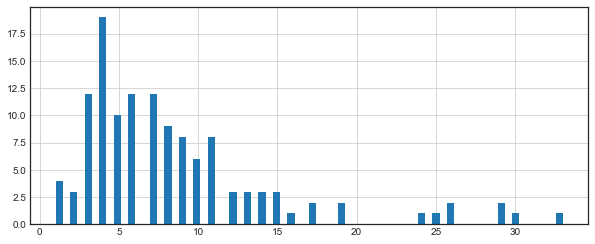

In [21]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

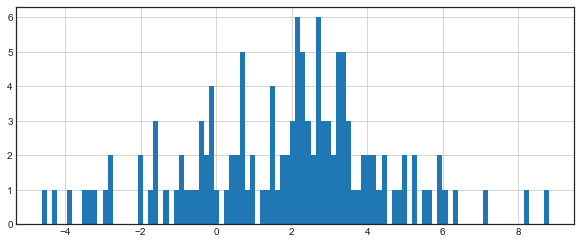

In [24]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=100)

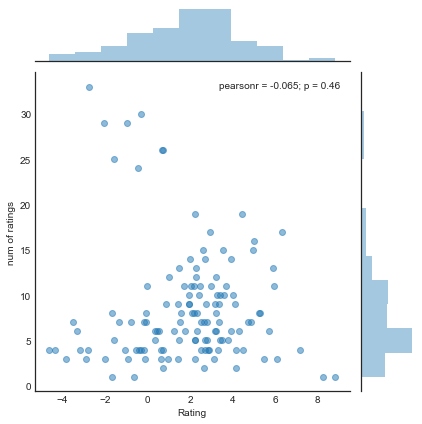

In [25]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)